In [1]:
import numpy as np
import os
from collections import defaultdict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
frame = pd.DataFrame(columns=["points","rate","typ","ms","rate_int"])

frame_compress = pd.DataFrame(columns=["points","rate","typ","ms"])


for file in os.listdir("performance"):
    if not file.startswith("performance"):
        continue
    with open("performance/" + file, "r") as f:
        _ = f.readline()
        point, rate = file.split('_')[1:3]
        for line in f.readlines():
            if line.startswith("compress"):
                comp_time = float(line.split(" ")[2])
                frame_compress = pd.concat(
                    [frame_compress
                    ,pd.DataFrame(data=[
                        {'points':int(point),
                         'rate':rate,
                         'typ':'compression',
                         'ms':float(line.split(" ")[2])}])],
                    ignore_index=True)                       
                continue
            if line.startswith("transfer_compress"):
                comp_time += float(line.split(" ")[2])                
                frame_compress = pd.concat(
                    [frame_compress
                    ,pd.DataFrame(data=[
                        {'points':int(point),
                         'rate':rate,
                         'typ':'compressed transfer',
                         'ms':float(line.split(" ")[2])}])],
                    ignore_index=True) 
                continue
            if line.startswith("decompress"):
                frame = pd.concat([frame,pd.DataFrame(data=[{'points':int(point),'rate':rate,'rate_int':int(rate),'typ':'without decompression','ms':comp_time}])],ignore_index=True)                       
                comp_time += float(line.split(" ")[2])
                frame_compress = pd.concat(
                    [frame_compress
                    ,pd.DataFrame(data=[
                        {'points':int(point),
                         'rate':rate,
                         'typ':'decompression',
                         'ms':float(line.split(" ")[2])}])],
                    ignore_index=True) 
                typ = 'compressed'
            if line.startswith("transfer_uncompress"):
                typ = 'no compression'
                comp_time = float(line.split(" ")[2])
            frame = pd.concat([frame,pd.DataFrame(data=[{'points':int(point),'rate':rate,'rate_int':int(rate),'typ':typ,'ms':comp_time}])],ignore_index=True)                       

In [3]:
frame["bytes"] = frame["points"]*8
frame["GB/s"] = (frame["bytes"]*10**-9)/(frame["ms"]*10**-3)
frame

,points,rate,typ,ms,rate_int,bytes,GB/s
0,40000000,16,without decompression,19.531480,16,320000000,16.383807
1,40000000,16,compressed,26.455520,16,320000000,12.095774
2,40000000,16,no compression,16.012600,16,320000000,19.984262
3,40000000,16,without decompression,5.394270,16,320000000,59.322207
4,40000000,16,compressed,12.451590,16,320000000,25.699529
...,...,...,...,...,...,...,...
13195,1000000,32,compressed,0.851521,32,8000000,9.394953
13196,1000000,32,no compression,0.562401,32,8000000,14.224726
13197,1000000,32,without decompression,0.515680,32,8000000,15.513497
13198,1000000,32,compressed,0.852640,32,8000000,9.382623


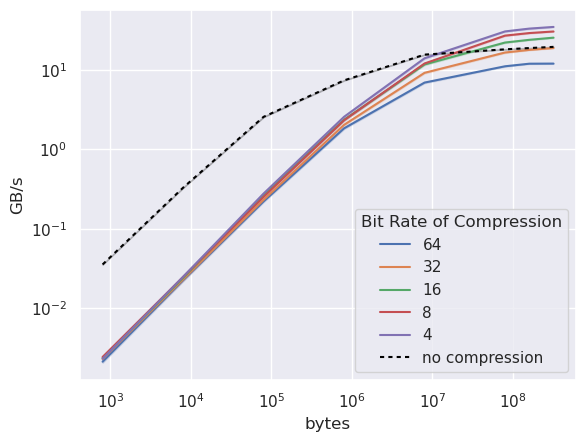

In [4]:
frame_copy = frame
frame = frame.loc[frame["typ"] != 'without decompression']

uncomp = frame.loc[frame["typ"] == 'no compression']
cmp = frame.loc[frame["typ"] != 'no compression']   
sns.lineplot(x="bytes", y="GB/s", hue='rate', data = cmp, hue_order=['64','32','16','8','4'])
g = sns.lineplot(x="bytes", y="GB/s", hue='typ', data=uncomp, palette=['black'],dashes=(2,2))
leg = g.axes.get_legend()
leg.set_title("Bit Rate of Compression")
plt.xscale('log')
plt.yscale('log')

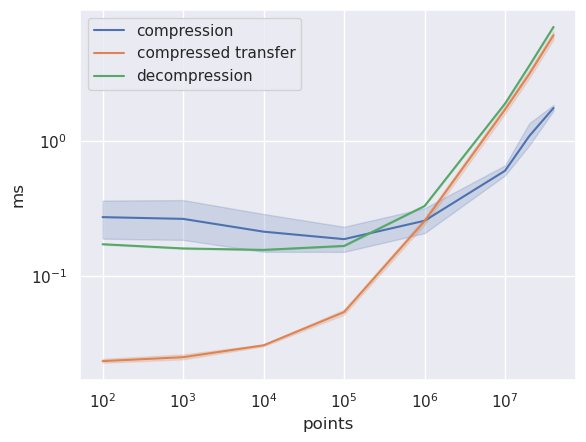

In [5]:
g = sns.lineplot(x="points", y="ms", hue='typ', data = frame_compress)

leg = g.axes.get_legend()
leg.set_title("")
plt.xscale('log')
plt.yscale('log')

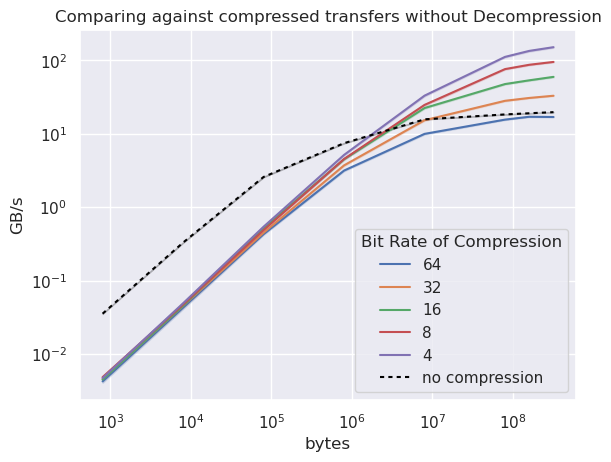

In [6]:
frame = frame_copy
uncomp = frame.loc[frame["typ"] == 'no compression']   
cmp = frame.loc[frame["typ"] == 'without decompression']   
sns.lineplot(x="bytes", y="GB/s", hue='rate', data = cmp, hue_order=['64','32','16','8','4'])
g = sns.lineplot(x="bytes", y="GB/s", hue='typ', data=uncomp, palette=['black'],dashes=(2,2))
leg = g.axes.get_legend()
leg.set_title("Bit Rate of Compression")
plt.title("Comparing against compressed transfers without Decompression")
plt.xscale('log')
plt.yscale('log')